# EDA and Generation for Subset-268

연수구, 남동구 지역의 임의로 선택된 561개 노드 중, 결측치 평균 이하를 제외한 노드로 선택

In [1]:
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from datetime import datetime


In [2]:
def visualize_missingno(
    df: pd.DataFrame, matrix: bool = True, heatmap: bool = True, bar: bool = True
):
    if matrix:
        msno.matrix(df)
        plt.show()

    if heatmap:
        msno.heatmap(df, labels=False)
        plt.show()

    if bar:
        msno.bar(df)
        plt.show()

In [3]:
gdf = gpd.read_file("../datasets/metr-imc/subsets/metr-imc-268/selected_road.shp")
gdf

,index,sensor_id,geometry
0,71,1650026001,POINT (126.7067 37.39807)
1,73,1650042800,POINT (126.73509 37.42093)
2,127,1650074500,POINT (126.71392 37.40455)
3,129,1650232500,POINT (126.73677 37.40341)
4,131,1650388801,POINT (126.69317 37.40302)
...,...,...,...
556,16293,1650037302,POINT (126.72667 37.41513)
557,16301,1650002302,POINT (126.71535 37.39645)
558,16311,1650231700,POINT (126.73463 37.40239)
559,16319,1640011900,POINT (126.67742 37.40453)


In [4]:
road_filter: pd.Series = gdf["sensor_id"]
road_filter = road_filter.astype(str).to_list()
print(len(road_filter))

561


In [5]:
from metr.dataset.metr_imc.base import Metr
metr_561_data = Metr("../datasets/metr-imc/subsets/metr-imc-268/subset-561")

OK


In [6]:
if not metr_561_data.is_complete:
    metr_561_data.generate_all_data(
        target_columns=road_filter,
        imcrts_path="../datasets/metr-imc/imcrts/imcrts_data.pkl",
        road_data_path="../datasets/metr-imc/nodelink/imc_link.shp",
        turn_info_path="../datasets/metr-imc/nodelink/imc_turninfo.shp",
    )
else:
    print("Data is already generated!")

Data is already generated!


In [7]:
df = metr_561_data.raw_base.traffic_data.data
df.iloc[:, :7]

,1650026001,1650042800,1650074500,1650232500,1650388801,1650395901,1650381201
2023-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-12-31 19:00:00,131.0,125.0,NaN,8.0,104.0,3.0,NaN
2023-12-31 20:00:00,110.0,112.0,NaN,0.0,65.0,0.0,NaN
2023-12-31 21:00:00,126.0,80.0,NaN,0.0,42.0,0.0,NaN
2023-12-31 22:00:00,99.0,74.0,NaN,0.0,42.0,0.0,NaN


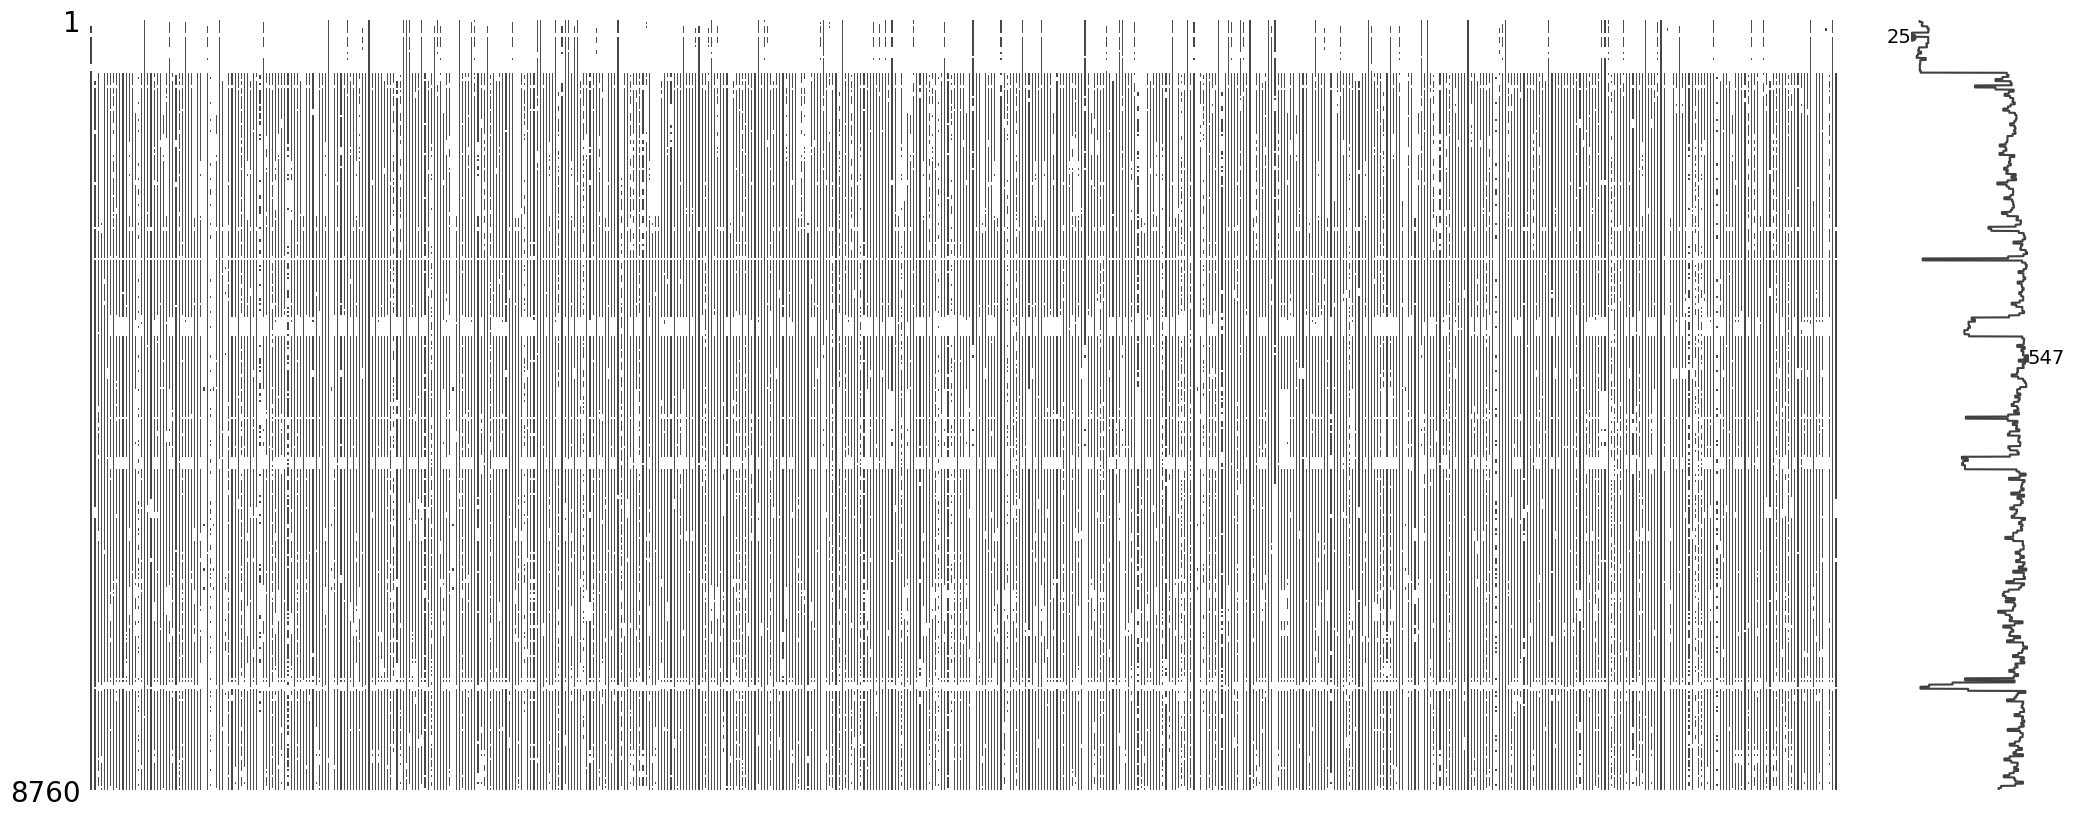

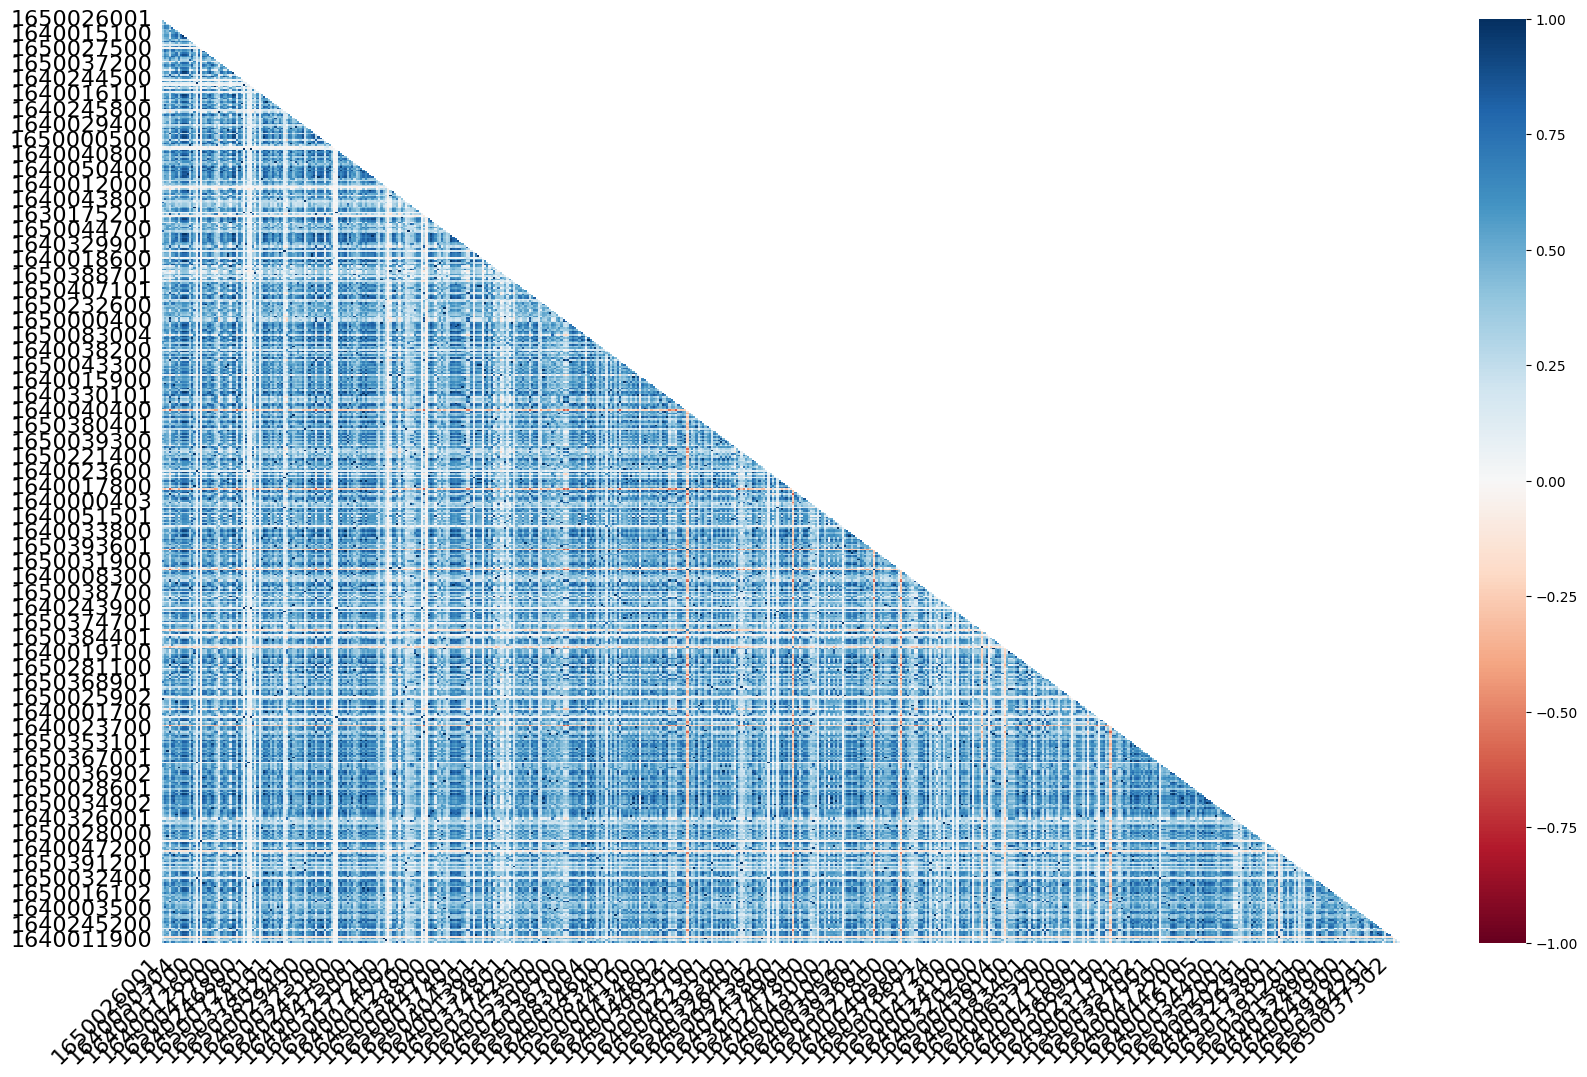

In [8]:
visualize_missingno(df, bar=False)

In [9]:
metr_561_data.export_data()

2024/07/29 11:35:57 metr.dataset.metr_imc.base [INFO] ../datasets/metr-imc/subsets/metr-imc-268/subset-561/metr-imc.h5 already exists. Skipping...
2024/07/29 11:35:57 metr.dataset.metr_imc.base [INFO] ../datasets/metr-imc/subsets/metr-imc-268/subset-561/metr_ids.txt already exists. Skipping...
2024/07/29 11:35:57 metr.dataset.metr_imc.base [INFO] ../datasets/metr-imc/subsets/metr-imc-268/subset-561/distances_imc_2023.csv already exists. Skipping...
2024/07/29 11:35:57 metr.dataset.metr_imc.base [INFO] ../datasets/metr-imc/subsets/metr-imc-268/subset-561/adj_mx.pkl already exists. Skipping...


In [10]:
df.notna().sum().describe()

count     561.000000
mean     7032.470588
std      1484.927283
min        24.000000
25%      6792.000000
50%      7368.000000
75%      7848.000000
max      8760.000000
dtype: float64

In [11]:
over50: pd.Series = (df.notna().sum() > df.notna().sum().describe()["50%"]) 
over50_df = df[over50[over50 == True].index]
over50_df

,1650026001,1650042800,1650074500,1650388801,1650395901,1640015100,1640015200,1650381701,1650374901,1640320400,...,1640244100,1640016103,1650389501,1650394201,1630011803,1640013902,1650043801,1650037302,1640011900,1650090702
2023-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,34.0,NaN
2023-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198.0,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,14.0,NaN
2023-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
2023-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3.0,NaN
2023-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.0,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,131.0,125.0,NaN,104.0,3.0,7.0,0.0,0.0,0.0,347.0,...,71.0,90.0,81.0,87.0,121.0,133.0,14.0,57.0,138.0,136.0
2023-12-31 20:00:00,110.0,112.0,NaN,65.0,0.0,3.0,3.0,6.0,0.0,351.0,...,83.0,75.0,74.0,89.0,123.0,100.0,19.0,57.0,127.0,101.0
2023-12-31 21:00:00,126.0,80.0,NaN,42.0,0.0,18.0,0.0,0.0,0.0,305.0,...,69.0,41.0,60.0,76.0,67.0,43.0,6.0,52.0,97.0,92.0
2023-12-31 22:00:00,99.0,74.0,NaN,42.0,0.0,8.0,0.0,0.0,0.0,300.0,...,26.0,16.0,22.0,40.0,49.0,24.0,3.0,19.0,47.0,73.0


2023-02-04 ~ 2023-04-21 데이터가 제일 결측치가 적고 깨끗하므로 이 부분을 선택

In [12]:
target_periods = pd.date_range(start="2023-02-04", end="2023-04-21", freq="h")
target_periods

DatetimeIndex(['2023-02-04 00:00:00', '2023-02-04 01:00:00',
               '2023-02-04 02:00:00', '2023-02-04 03:00:00',
               '2023-02-04 04:00:00', '2023-02-04 05:00:00',
               '2023-02-04 06:00:00', '2023-02-04 07:00:00',
               '2023-02-04 08:00:00', '2023-02-04 09:00:00',
               ...
               '2023-04-20 15:00:00', '2023-04-20 16:00:00',
               '2023-04-20 17:00:00', '2023-04-20 18:00:00',
               '2023-04-20 19:00:00', '2023-04-20 20:00:00',
               '2023-04-20 21:00:00', '2023-04-20 22:00:00',
               '2023-04-20 23:00:00', '2023-04-21 00:00:00'],
              dtype='datetime64[ns]', length=1825, freq='h')

In [13]:
metr_268_data = Metr("../datasets/metr-imc/subsets/metr-imc-268")

OK


In [14]:
if not metr_268_data.is_complete:
    metr_268_data.generate_all_data(
        target_columns=over50_df.columns,
        target_periods=target_periods,
        imcrts_path="../datasets/metr-imc/imcrts/imcrts_data.pkl",
        road_data_path="../datasets/metr-imc/nodelink/imc_link.shp",
        turn_info_path="../datasets/metr-imc/nodelink/imc_turninfo.shp",
    )
else:
    print("Data is already generated!")

Data is already generated!


In [15]:
metr_268_data.export_data()

2024/07/29 11:35:57 metr.dataset.metr_imc.base [INFO] ../datasets/metr-imc/subsets/metr-imc-268/metr-imc.h5 already exists. Skipping...
2024/07/29 11:35:57 metr.dataset.metr_imc.base [INFO] ../datasets/metr-imc/subsets/metr-imc-268/metr_ids.txt already exists. Skipping...
2024/07/29 11:35:57 metr.dataset.metr_imc.base [INFO] ../datasets/metr-imc/subsets/metr-imc-268/distances_imc_2023.csv already exists. Skipping...
2024/07/29 11:35:57 metr.dataset.metr_imc.base [INFO] ../datasets/metr-imc/subsets/metr-imc-268/adj_mx.pkl already exists. Skipping...


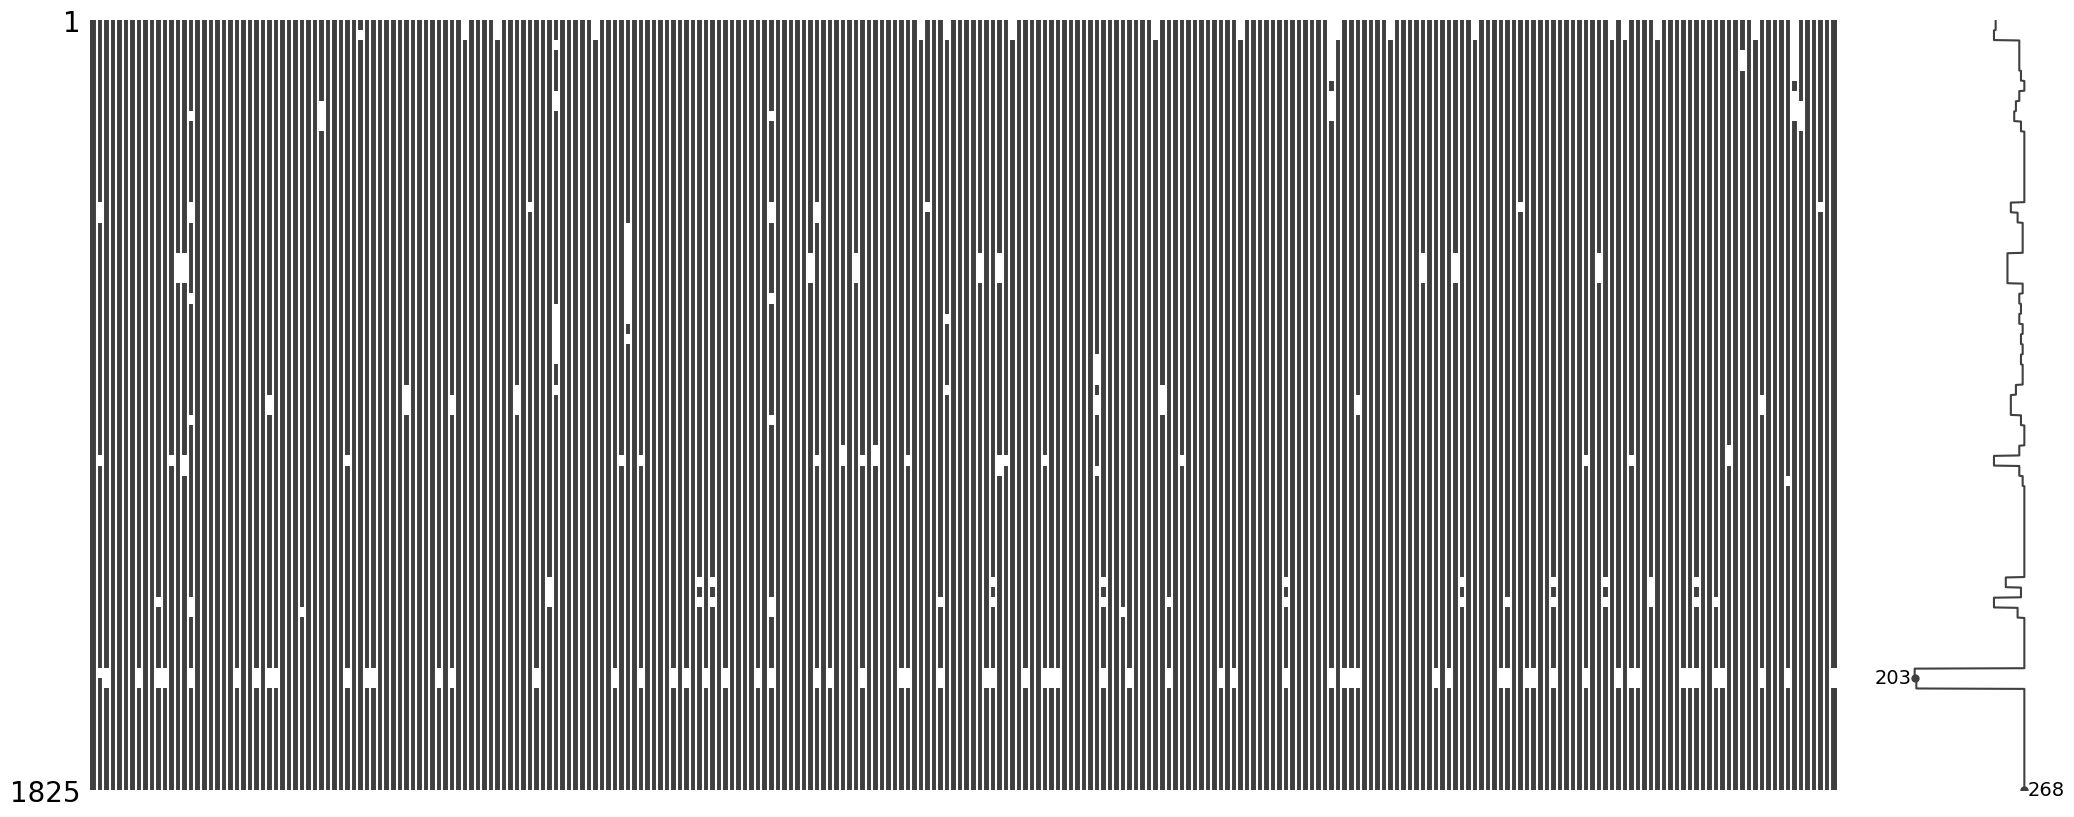

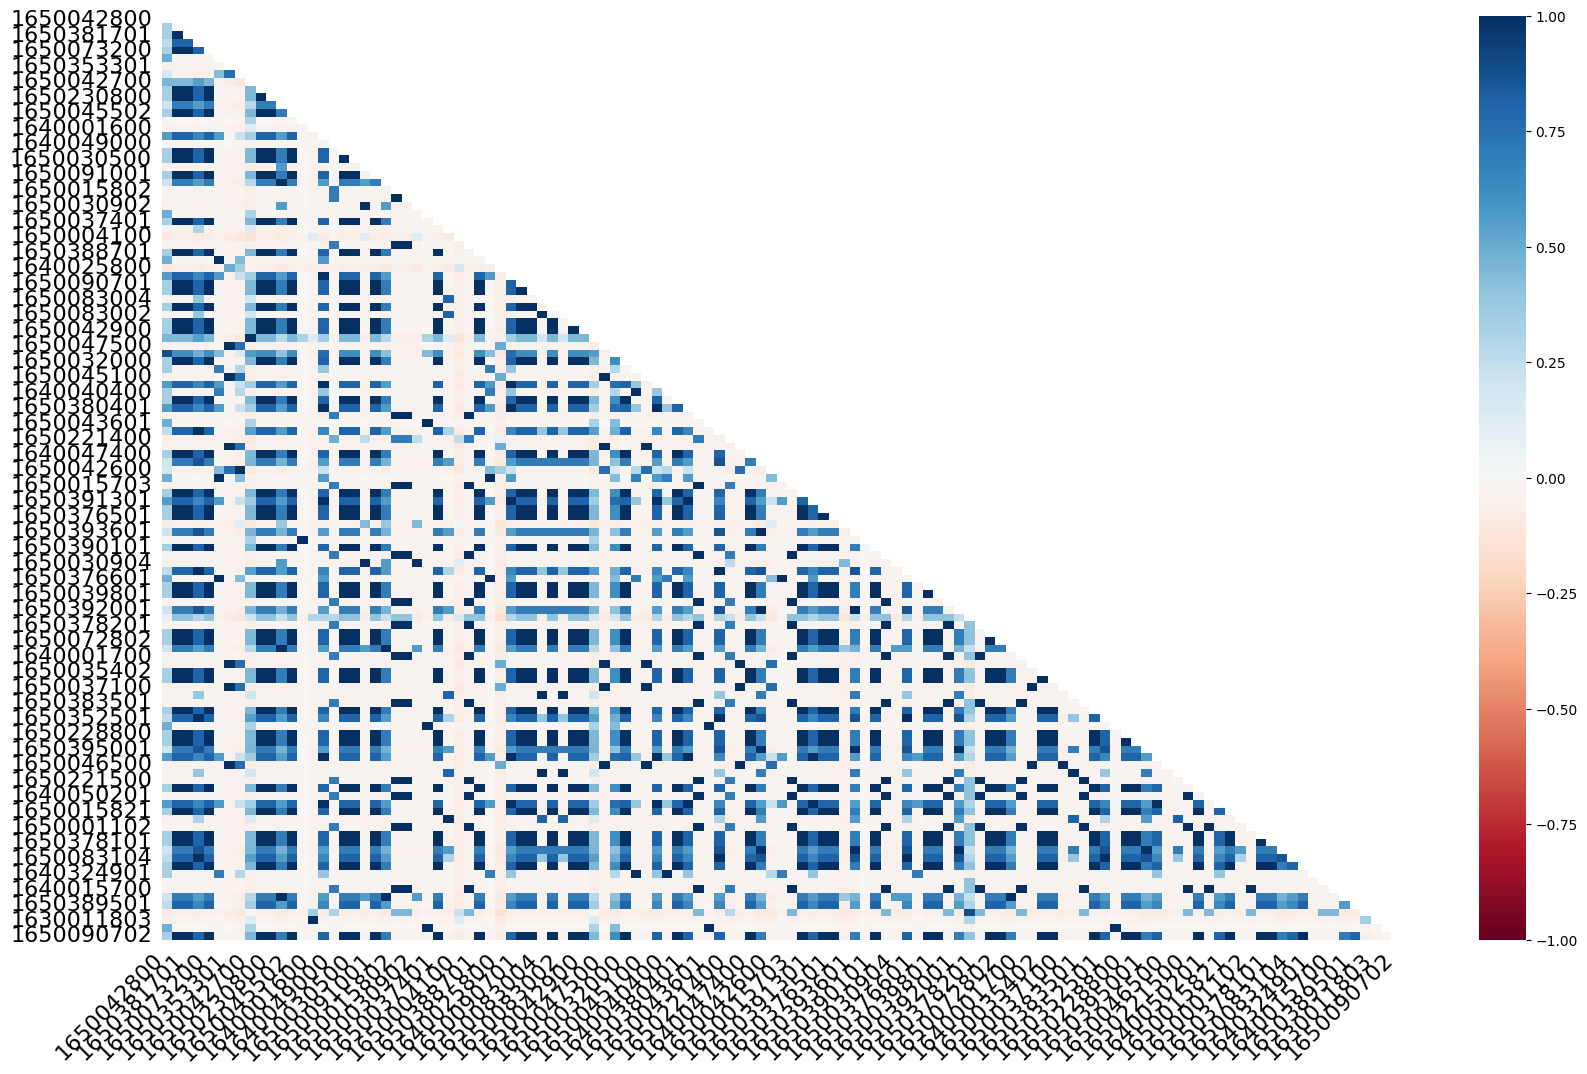

In [16]:
visualize_missingno(metr_268_data.raw_base.traffic_data.data, bar=False)

In [17]:
from metr.dataset.interpolator import TimeMeanFillInterpolator

interpolator = TimeMeanFillInterpolator()
metr_268_data.raw_base.traffic_data.interpolate(interpolator)

2024/07/29 11:35:57 metr.dataset.metr_imc.converter.metr_imc [INFO] Interpolating METR-IMC data...
2024/07/29 11:35:59 metr.dataset.metr_imc.converter.metr_imc [INFO] Interplating Complete


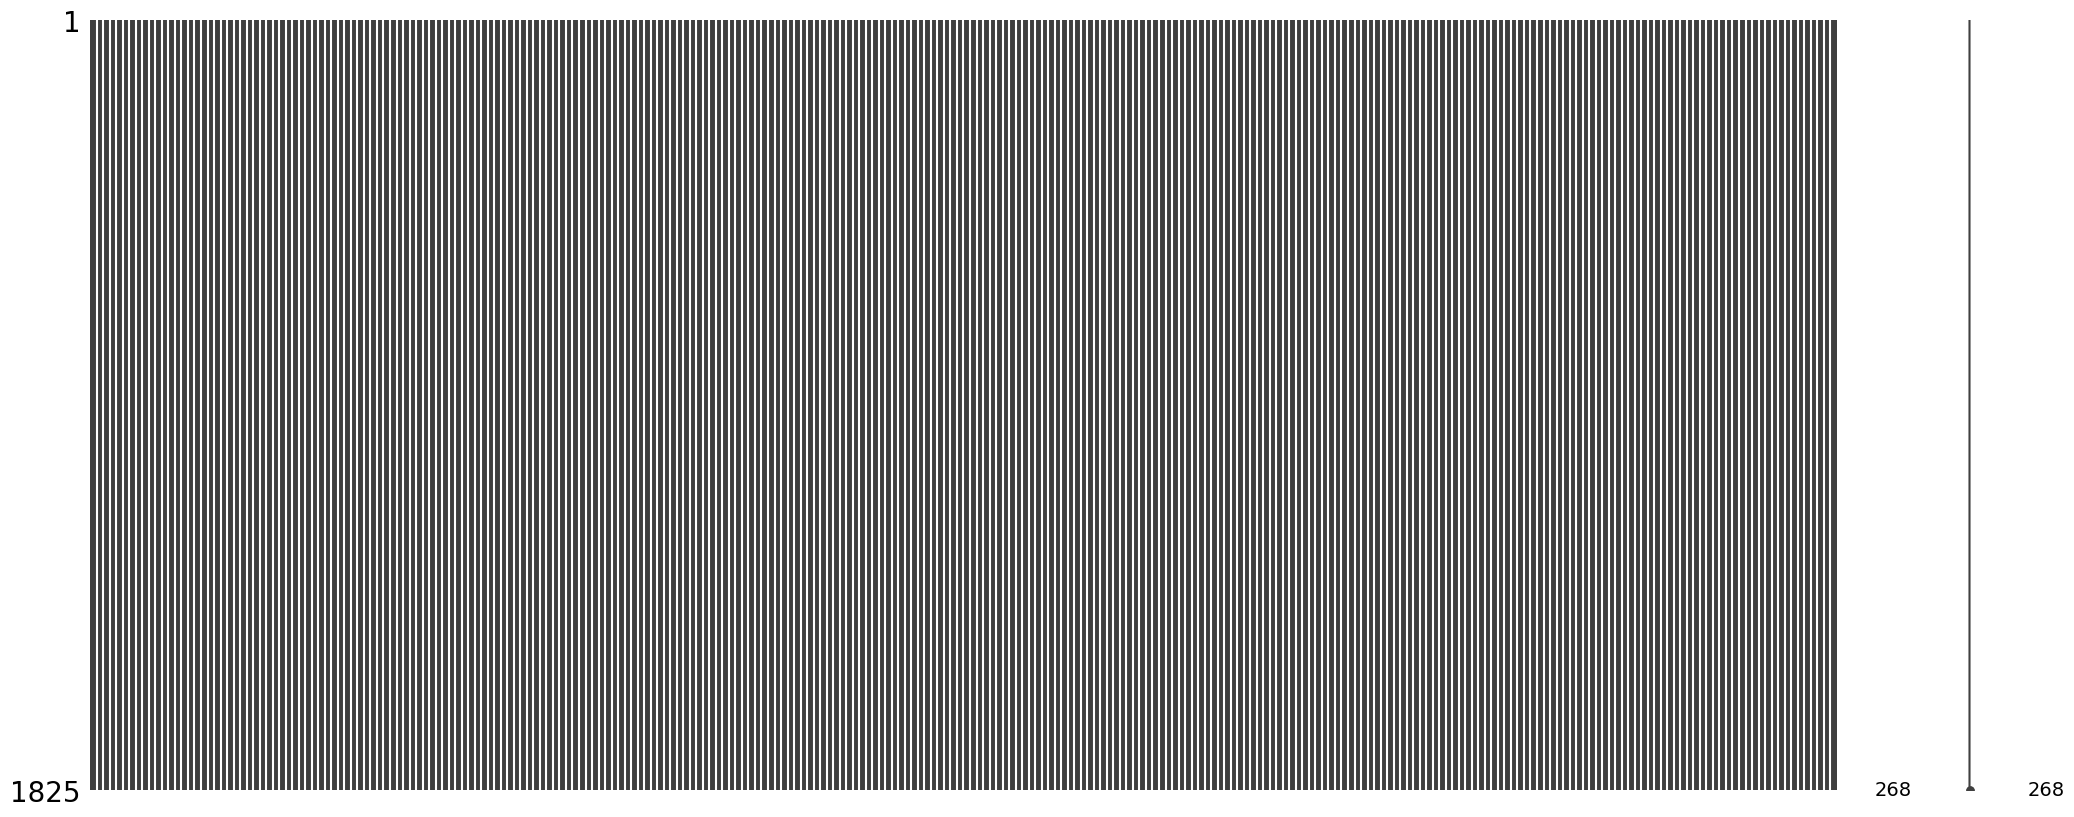

/Users/sbyim/Workspace/Python/songdo-traffic/notebooks/.venv/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/sbyim/Workspace/Python/songdo-traffic/notebooks/.venv/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


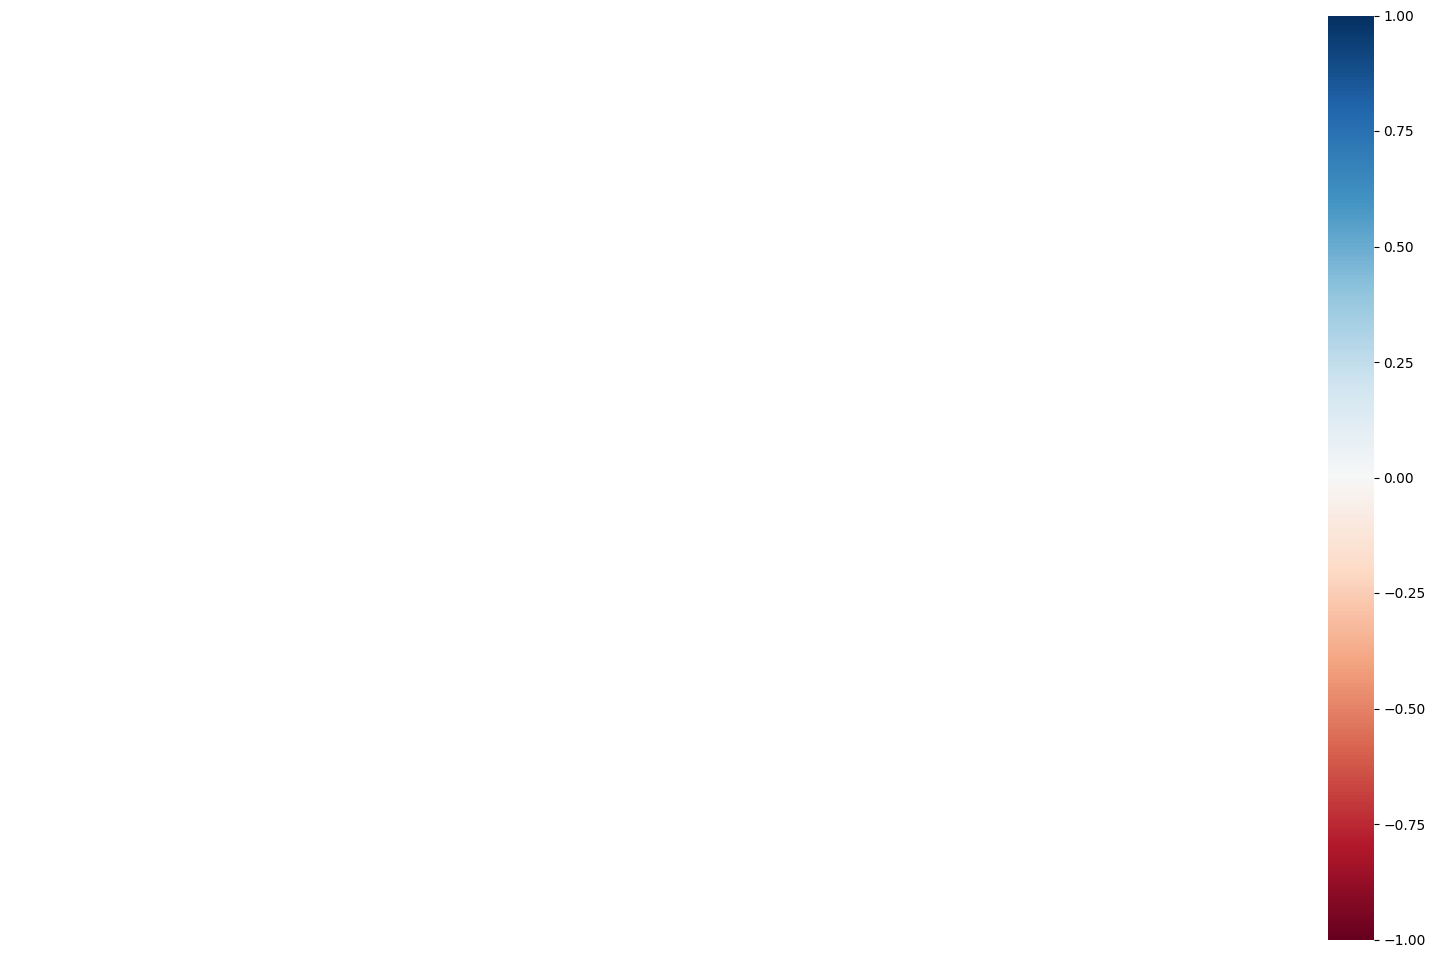

In [18]:
visualize_missingno(metr_268_data.raw_base.traffic_data.data, bar=False)

In [19]:
metr_268_data.export_data(overwrite=True)

2024/07/29 11:35:59 metr.dataset.metr_imc.base [INFO] Force generating files...
2024/07/29 11:35:59 metr.dataset.metr_imc.converter.metr_imc [INFO] Saving METR-IMC data to ../datasets/metr-imc/subsets/metr-imc-268/metr-imc.h5...
2024/07/29 11:35:59 metr.dataset.metr_imc.converter.metr_imc [INFO] Complete
2024/07/29 11:35:59 metr.dataset.metr_imc.converter.metr_ids [INFO] Saving METR-IMC IDs to ../datasets/metr-imc/subsets/metr-imc-268/metr_ids.txt...
2024/07/29 11:35:59 metr.dataset.metr_imc.converter.metr_ids [INFO] Complete
2024/07/29 11:35:59 metr.dataset.metr_imc.converter.distance_imc [INFO] Saving distance data to ../datasets/metr-imc/subsets/metr-imc-268/distances_imc_2023.csv...
2024/07/29 11:36:00 metr.dataset.metr_imc.converter.adj_mx [INFO] Saving adjacency matrix data to ../datasets/metr-imc/subsets/metr-imc-268/adj_mx.pkl...


In [21]:
metr_268_data.raw_base.traffic_data.to_excel("../datasets/metr-imc/subsets/metr-imc-268")

2024/07/29 11:38:46 metr.dataset.metr_imc.converter.metr_imc [INFO] Saving METR-IMC data to ../datasets/metr-imc/subsets/metr-imc-268/metr-imc.xlsx...
2024/07/29 11:38:51 metr.dataset.metr_imc.converter.metr_imc [INFO] Complete
